# Programme for International Student Assessment
## by Mohamed AbdelGawad Ibrahim

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a
conventional school test. Rather than examining how well
students have learned the school curriculum, it looks at how
well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those
economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy.

> For simplicity, I extracted 8 columns that I am interested in, out of the original dataset, then saved this subset to local csv file.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# df = pd.read_csv("pisa2012.csv", usecols=['ST04Q01', 'ST15Q01', 'ST19Q01', 'ST28Q01', 'ST49Q01', 'ST35Q06', 'ST29Q04', 'OUTHOURS']).dropna()
# df.rename(columns={
#     'ST04Q01': 'gender', 
#     'ST15Q01': 'mother_job_status',
#     'ST19Q01' : 'father_job_status',
#     'ST28Q01' : 'books_count',
#     'ST49Q01' : 'talk_maths_with_friends',
#     'OUTHOURS' : 'out-study-hours',
#     'ST35Q06' : 'parents_like_maths',
#     'ST29Q04' : 'enjoy_maths'
# }, inplace=True)
# df.to_csv("pisa2012_subset.csv", encoding='utf-8', index=False)

df = pd.read_csv("pisa2012_subset.csv")

df.head(10)

,gender,mother_job_status,father_job_status,books_count,enjoy_maths,parents_like_maths,talk_maths_with_friends,out-study-hours
0,Female,Working full-time <for pay>,Working full-time <for pay>,201-500 books,Disagree,Agree,Sometimes,8.0
1,Female,Working full-time <for pay>,Working full-time <for pay>,More than 500 books,Agree,Agree,Sometimes,24.0
2,Female,Working full-time <for pay>,Working full-time <for pay>,0-10 books,Agree,Agree,Sometimes,18.0
3,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,0-10 books,Strongly disagree,Strongly agree,Sometimes,29.0
4,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,0-10 books,Agree,Agree,Sometimes,7.0
5,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,26-100 books,Agree,Agree,Often,36.0
6,Female,"Not working, but looking for a job",Working full-time <for pay>,11-25 books,Agree,Strongly agree,Sometimes,10.0
7,Male,"Other (e.g. home duties, retired)",Working full-time <for pay>,201-500 books,Agree,Strongly agree,Often,25.0
8,Female,"Other (e.g. home duties, retired)",Working part-time <for pay>,26-100 books,Strongly agree,Agree,Often,23.0
9,Male,Working full-time <for pay>,Working full-time <for pay>,11-25 books,Agree,Strongly agree,Sometimes,19.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   138030 non-null  object 
 1   mother_job_status        138030 non-null  object 
 2   father_job_status        138030 non-null  object 
 3   books_count              138030 non-null  object 
 4   enjoy_maths              138030 non-null  object 
 5   parents_like_maths       138030 non-null  object 
 6   talk_maths_with_friends  138030 non-null  object 
 7   out-study-hours          138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


### What is the structure of your dataset?

> There are 138,030 entries in the dataset with 11 features as follows: 
> * gender
> * mother_job_status : Mother Current Job Status
> * father_job_status : Father Current Job Status
> * enjoy_maths : Math Interest - Enjoy Maths
> * parents_like_maths : Subjective Norms - Parents Like Mathematics
> * books_count : How many books at home
> * talk_maths_with_friends : Math Behaviour - Talk about Maths with Friends
> * out-study-hours : Out-of-School Study Time

> Most variables are categorical in nature, but the variables out-study-hours, wealth, and pv1math are numerical variables.


### What is/are the main feature(s) of interest in your dataset?

> Out-of-School Study Time

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * enjoy_maths
> * mother_job_status
> * father_job_status
> * parents_like_maths

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

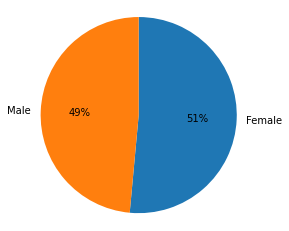

In [4]:
# How many males vs. females in the dataset
sorted_gender = df.gender.value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, startangle = 90, counterclock = False, autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.1);
# We have the used option `Square`. 
plt.axis('square');

> We've slightly more females than males in our dataset.

In [5]:
df.mother_job_status.value_counts()

Working full-time <for pay>            65289
Other (e.g. home duties, retired)      40730
Working part-time <for pay>            23357
Not working, but looking for a job      8654
Name: mother_job_status, dtype: int64

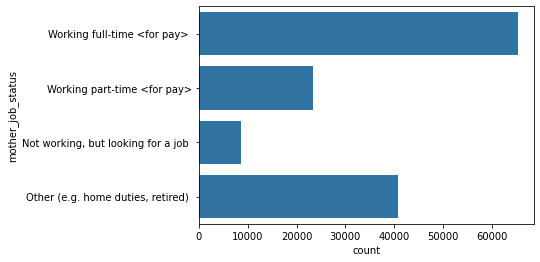

In [6]:
# Mother Current Job Status
base_color = sb.color_palette()[0]
mothers_working_order = [
    'Working full-time <for pay> ',
    'Working part-time <for pay>',
    'Not working, but looking for a job ',
    'Other (e.g. home duties, retired) '
]
sb.countplot(data = df, y = 'mother_job_status', color = base_color, order = mothers_working_order);

> We can see that the majority of mothers are working full-time, and many mothers aren't working neither looking for a job.

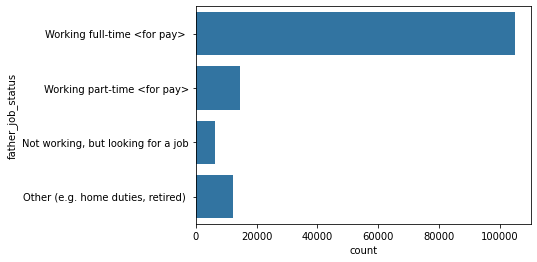

In [7]:
# Father Current Job Status
fathers_working_order = [
    'Working full-time <for pay> ',
    'Working part-time <for pay>',
    'Not working, but looking for a job',
    'Other (e.g. home duties, retired) '
]
sb.countplot(data = df, y = 'father_job_status', color = base_color, order = fathers_working_order);

> The majority of fathers are working full time with very few are not working neither looking for a job.

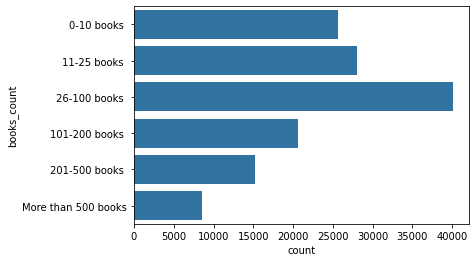

In [8]:
# How many books at home
books_order = [
    '0-10 books ',
    '11-25 books ',
    '26-100 books ',
    '101-200 books ',
    '201-500 books ',
    'More than 500 books'
]
sb.countplot(data = df, y = 'books_count', color = base_color, order = books_order);

> Most students have between 26 to 100 books at home

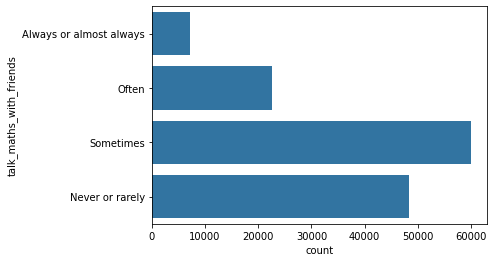

In [9]:
# How many students Talk about Maths with Friends
talks_order = [
    'Always or almost always',
    'Often',
    'Sometimes',
    'Never or rarely'
]
sb.countplot(data = df, y = 'talk_maths_with_friends', color = base_color, order = talks_order);

> Most students either talks about maths with their friends sometimes or rarly.

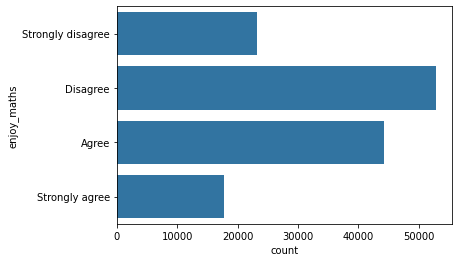

In [10]:
# How many students enjoy maths
enjoy_order = [
    'Strongly disagree',
    'Disagree',
    'Agree',
    'Strongly agree'
]
sb.countplot(data = df, y = 'enjoy_maths', color = base_color, order = enjoy_order);

> The majority of students don't enjoy math!

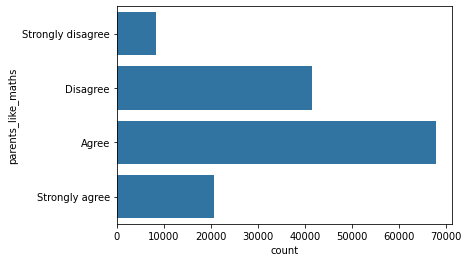

In [11]:
# How many parents like maths
sb.countplot(data = df, y = 'parents_like_maths', color = base_color, order = enjoy_order);

> The majority of parents like maths!

(array([1.12856e+05, 2.08730e+04, 3.19900e+03, 7.80000e+02, 1.87000e+02,
        7.40000e+01, 2.90000e+01, 9.00000e+00, 9.00000e+00, 1.40000e+01]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

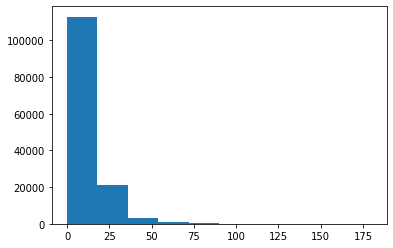

In [12]:
# Study hours
plt.hist(data = df, x = 'out-study-hours')

> The distribution of study hours are right skewed, so we need to use log transformation

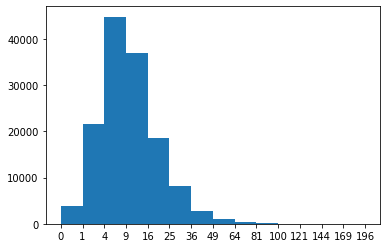

In [13]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(df['out-study-hours'].max())+1, 1)

# Plot the scaled data
plt.hist(df['out-study-hours'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(df['out-study-hours'].max())+1, 1)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

> Most students spend between 4 to 9 hours studing out of school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of 'out-study-hours' variable was highly skewed to the right, so I had to do custom transformation to zoom in the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   138030 non-null  object 
 1   mother_job_status        138030 non-null  object 
 2   father_job_status        138030 non-null  object 
 3   books_count              138030 non-null  object 
 4   enjoy_maths              138030 non-null  object 
 5   parents_like_maths       138030 non-null  object 
 6   talk_maths_with_friends  138030 non-null  object 
 7   out-study-hours          138030 non-null  float64
dtypes: float64(1), object(7)
memory usage: 8.4+ MB


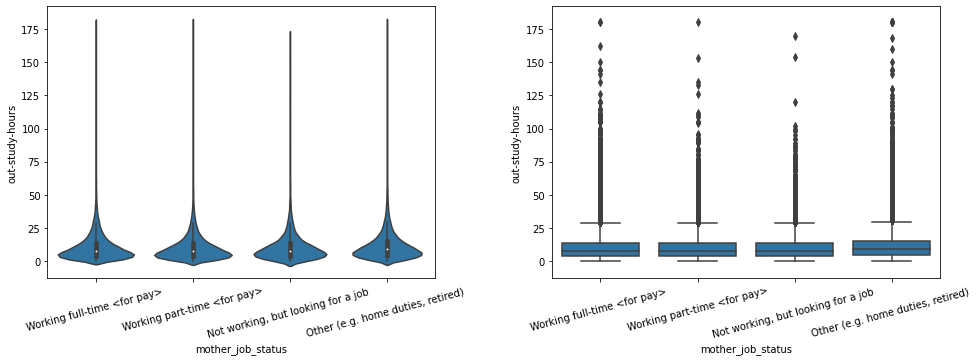

In [15]:
# Step 3. Convert the "mother_job_status" column from a plain object type into an ordered categorical type 
mothers_working_order = [
    'Working full-time <for pay> ',
    'Working part-time <for pay>',
    'Not working, but looking for a job ',
    'Other (e.g. home duties, retired) '
]

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=mothers_working_order)

# Use pandas.astype() to convert the "mother_job_status" column from a plain object type into an ordered categorical type 
df['mother_job_status'] = df['mother_job_status'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
plt.tight_layout()

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df, x='mother_job_status', y='out-study-hours', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='mother_job_status', y='out-study-hours', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

plt.subplots_adjust(hspace=0.3, wspace=0.3)


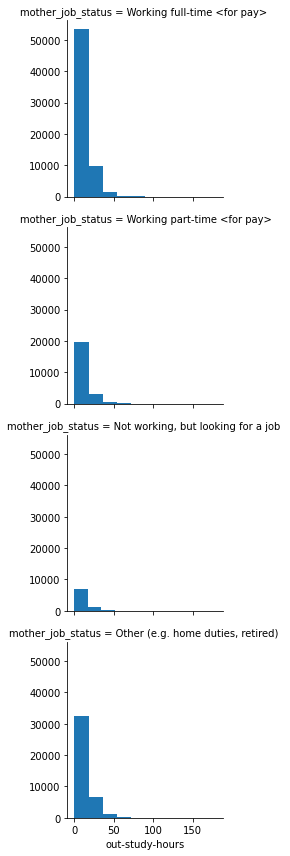

In [16]:
# Plot the Seaborn's FacetGrid
# I couldn't get them all 4 side by side; as their titles tend to overlap
g = sb.FacetGrid(data = df, col = 'mother_job_status', col_wrap=1)
g.map(plt.hist, "out-study-hours")

> Interestingly, students study hours when mother is working are higher than when mother is not working!

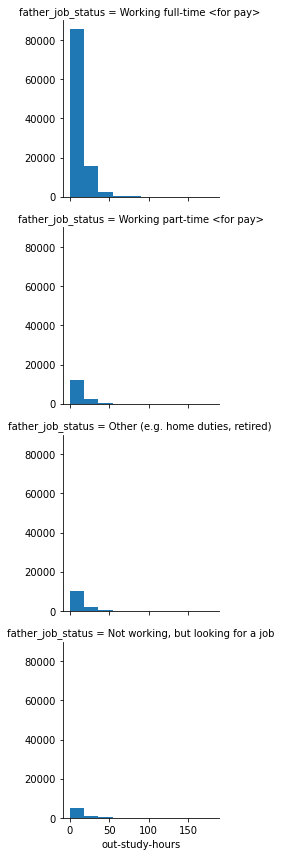

In [17]:
# Plot the Seaborn's FacetGrid
# I couldn't get them all 4 side by side; as their titles tend to overlap
g = sb.FacetGrid(data = df, col = 'father_job_status', col_wrap=1)
g.map(plt.hist, "out-study-hours")

> Study hours tend to decrease when father employment's status goes through:  
working full time > part time > other > looking for job

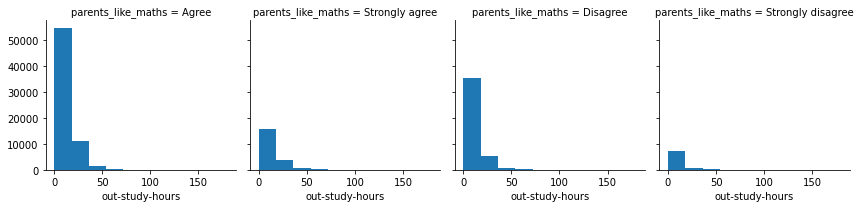

In [18]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'parents_like_maths', col_wrap=4)
g.map(plt.hist, "out-study-hours")

> Parents who like maths, their children study hours are more than the others.

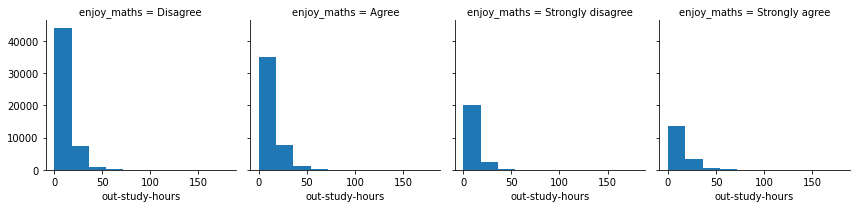

In [19]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'enjoy_maths', col_wrap=4)
g.map(plt.hist, "out-study-hours")

> Students who doesn't enjoy math are studying more at home than other students who enjoy math!

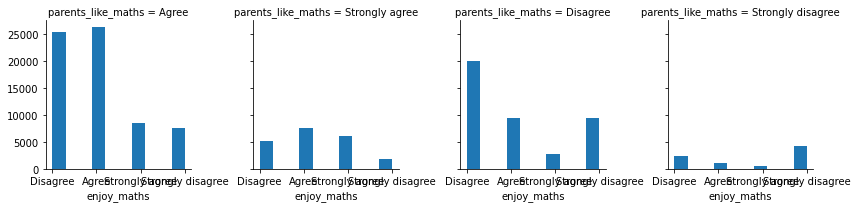

In [20]:
# Plot the Seaborn's FacetGrid
# their titles tend to overlap
g = sb.FacetGrid(data = df, col = 'parents_like_maths', col_wrap=4)
g.map(plt.hist, "enjoy_maths")

> WOW!
> * Parents who agree to like maths, their children agree to enjoy maths
> * Parents who disagree to like maths, their children disagree to enjoy maths
> * Parents who strongly agree to like maths, their children strongly agree to enjoy maths
> * Parents who strongly disagree to like maths, their children strongly disagree to enjoy maths

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Students who doesn't enjoy math are studying more at home than other students who enjoy math!
> * Parents who like maths, their children study hours are more than the others.
> * Study hours tend to decrease when father employment's status goes through:
working full time > part time > other > looking for job
> * students study hours when mother is working are higher than when mother is not working!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Parents who agree to like maths, their children agree to enjoy maths
> * Parents who disagree to like maths, their children disagree to enjoy maths
> * Parents who strongly agree to like maths, their children strongly agree to enjoy maths
> * Parents who strongly disagree to like maths, their children strongly disagree to enjoy maths

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138030 entries, 0 to 138029
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   gender                   138030 non-null  object  
 1   mother_job_status        138030 non-null  category
 2   father_job_status        138030 non-null  object  
 3   books_count              138030 non-null  object  
 4   enjoy_maths              138030 non-null  object  
 5   parents_like_maths       138030 non-null  object  
 6   talk_maths_with_friends  138030 non-null  object  
 7   out-study-hours          138030 non-null  float64 
dtypes: category(1), float64(1), object(6)
memory usage: 7.5+ MB


C:\Users\Muhammad\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


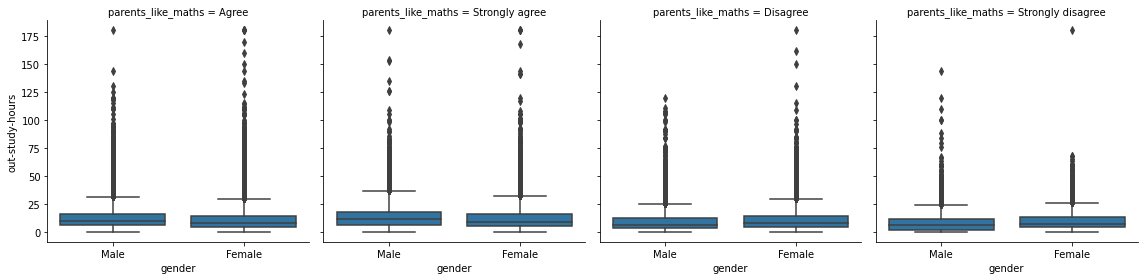

In [22]:
g = sb.FacetGrid(data = df, col = 'parents_like_maths', height = 4)
g.map(sb.boxplot, 'gender', 'out-study-hours')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I cannot really observe a relationship between gender, parents_like_maths, and out_study_hours variables.

### Were there any interesting or surprising interactions between features?

> No, I cannot observe any.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!